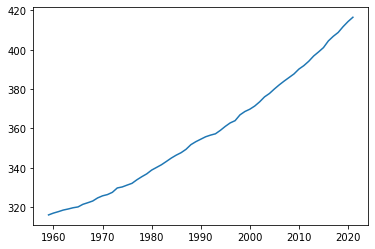

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dat = pd.read_csv("co2level.csv")
year = dat["Year"]
ppm = dat["PPM"]
plt.plot(year,ppm)

C:\Users\Kingster\AppData\Local\Temp\ipykernel_5936\31132258.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(ppm).show()


ADF test results:  (-5.73305330647872, 6.532757429063579e-07, 5, 55, {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}, 75.6032256009514)
background noise test results:     lb_stat  lb_pvalue
1  9.267213   0.002333


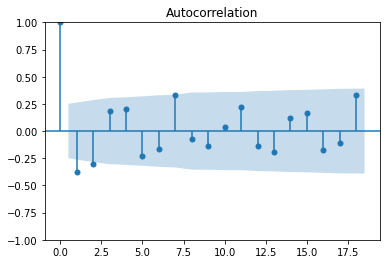

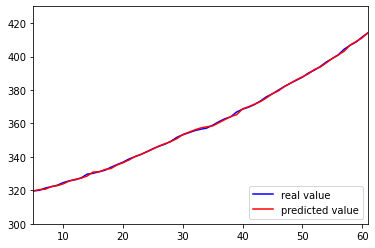

In [69]:
import warnings
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
dat = pd.read_csv("co2level.csv")

ppm = np.diff(dat["PPM"],2)
year = dat["Year"].tail(61)

plot_acf(ppm).show()
print("ADF test results: ",ADF(ppm))


from statsmodels.stats.diagnostic import acorr_ljungbox
print("background noise test results:",acorr_ljungbox(ppm,lags=1))

from statsmodels.tsa.arima.model import ARIMA

# ppm = ppm.astype(float)
# bic_matrix = []
# for p in range(7):
#     temp = []
#     for q in range(7):
#          try:
#             temp.append(ARIMA(ppm,order=(p,2,q)).fit().bic)
#          except:
#             temp.append(None)
#     bic_matrix.append(temp)
#
# print(bic_matrix)
#
# bic_matrix = pd.dataFrame(bic_matrix)
# p,q = bic_matrix.idxmin()
# print(p," ",q)

# best is (0,2,3)

model = ARIMA(dat["PPM"],order=(0,2,3)).fit()
model.summary()
#model.forecast(5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dat["PPM"],color="blue",label="real value")
ax.plot(model.fittedvalues, color="red",label="predicted value")
plt.legend(loc="lower right")
plt.xlim([5,61])
plt.ylim([300,430])
plt.savefig("omg.png",dpi=500)